In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
encoded_columns=['sex','cp','fbs','exang','slope','ca','thal','restecg']

In [8]:
numerical_columns=['age','trestbps','chol','thalach','oldpeak']

In [9]:
X=df.drop('target',axis=1)

In [10]:
y=df['target']

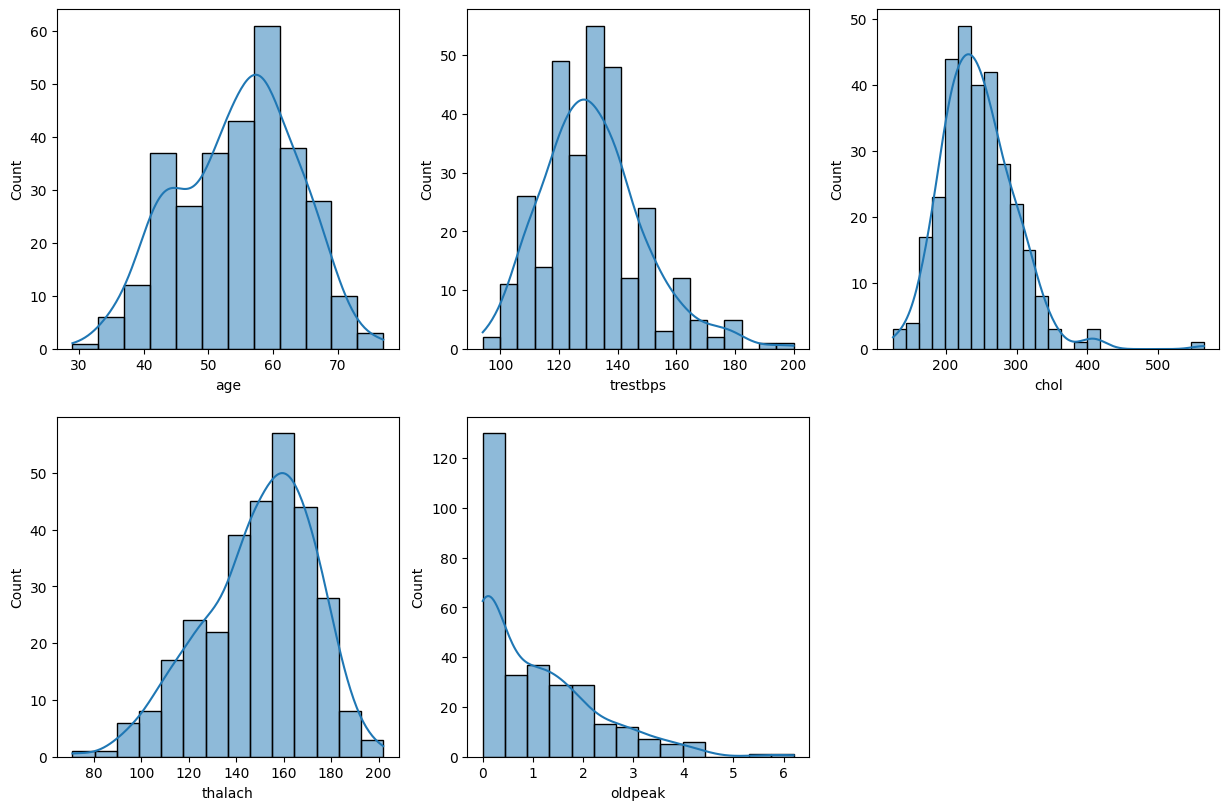

In [11]:
plt.figure(figsize=(15,15))
for i,col in enumerate(X[numerical_columns],1):
    plt.subplot(3,3,i)
    sns.histplot(X[col],kde=True)
plt.show()

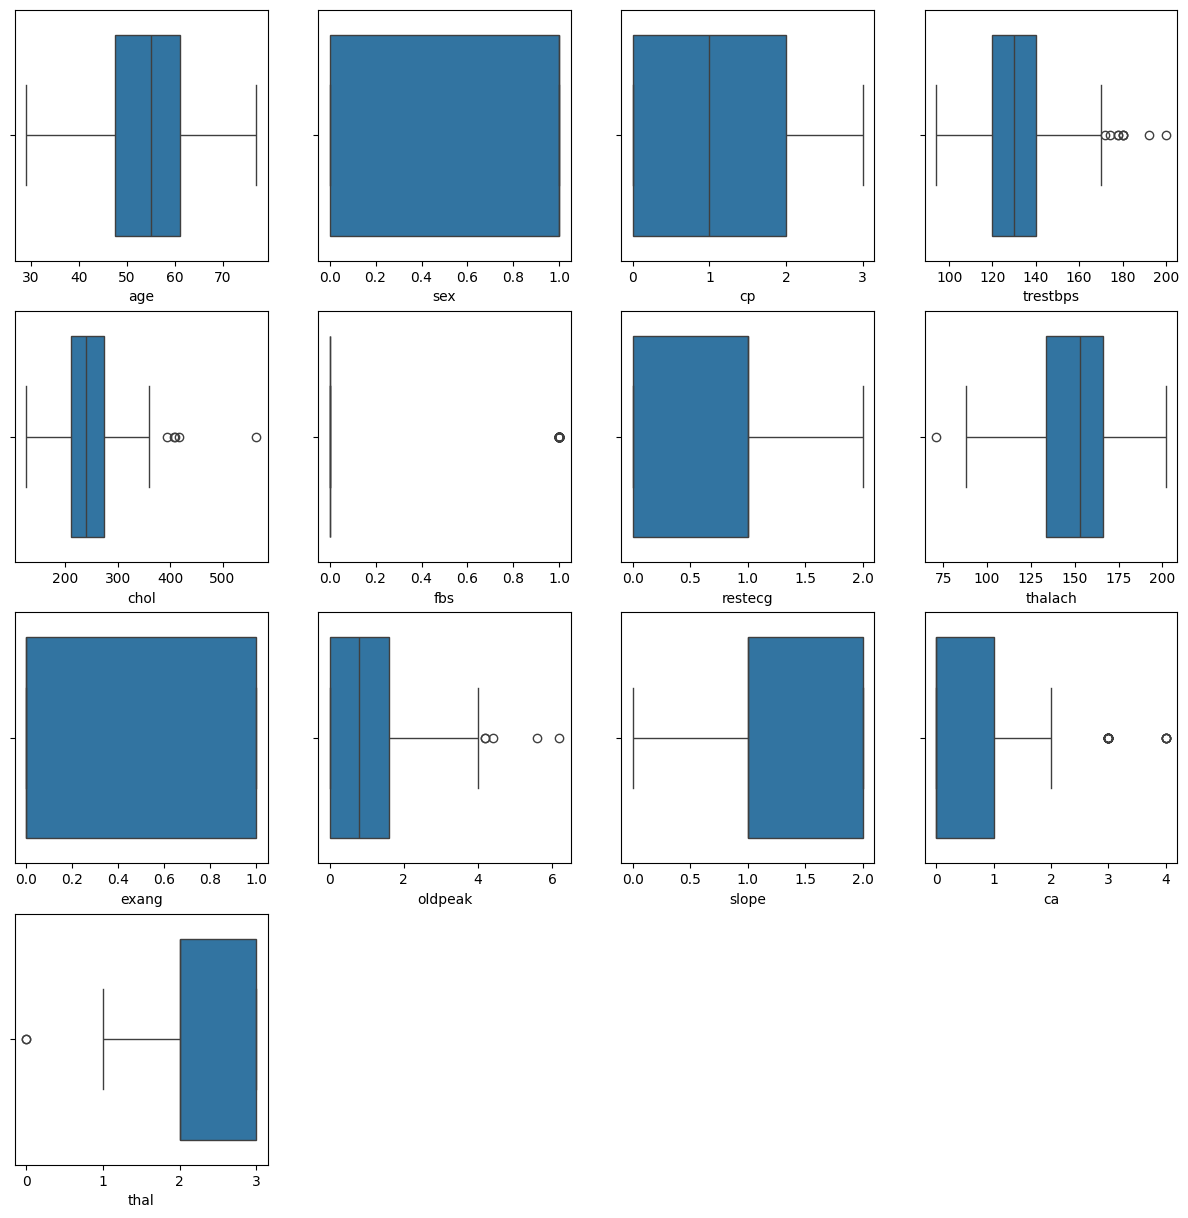

In [12]:
plt.figure(figsize=(15,15))
for i,col in enumerate(X.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(x=X[col])
plt.show()

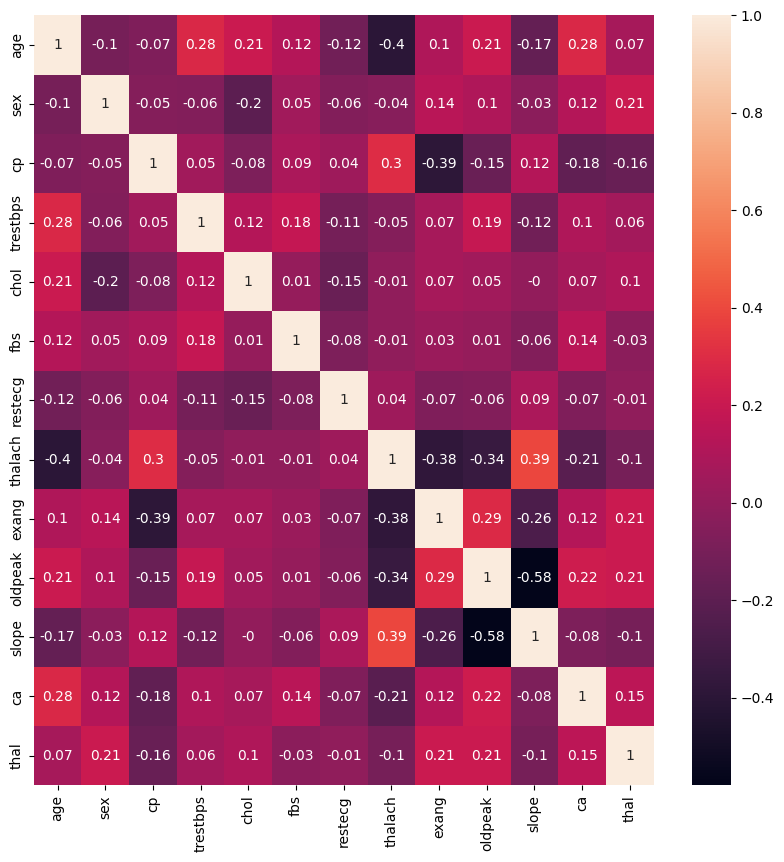

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(round(X.corr(),2),annot=True)
plt.show()

In [14]:
for col in X.columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df[col]=df[col].clip(lower_limit,upper_limit)

In [15]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [16]:
X_transformed=scale.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [20]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [21]:
decision_tree=DecisionTreeClassifier()

In [22]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=decision_tree.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'max_depth': [2, 3, 4, 5,8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}


In [29]:
cv=GridSearchCV(decision_tree,param_grid=param_grid,cv=5)

In [30]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [31]:
y_pred=cv.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7540983606557377

In [33]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [34]:
cv.best_score_

0.7768707482993198

In [35]:
new_dt=DecisionTreeClassifier(criterion ='entropy',max_depth= 8,min_samples_leaf= 5,min_samples_split= 5)

In [36]:
new_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=5)

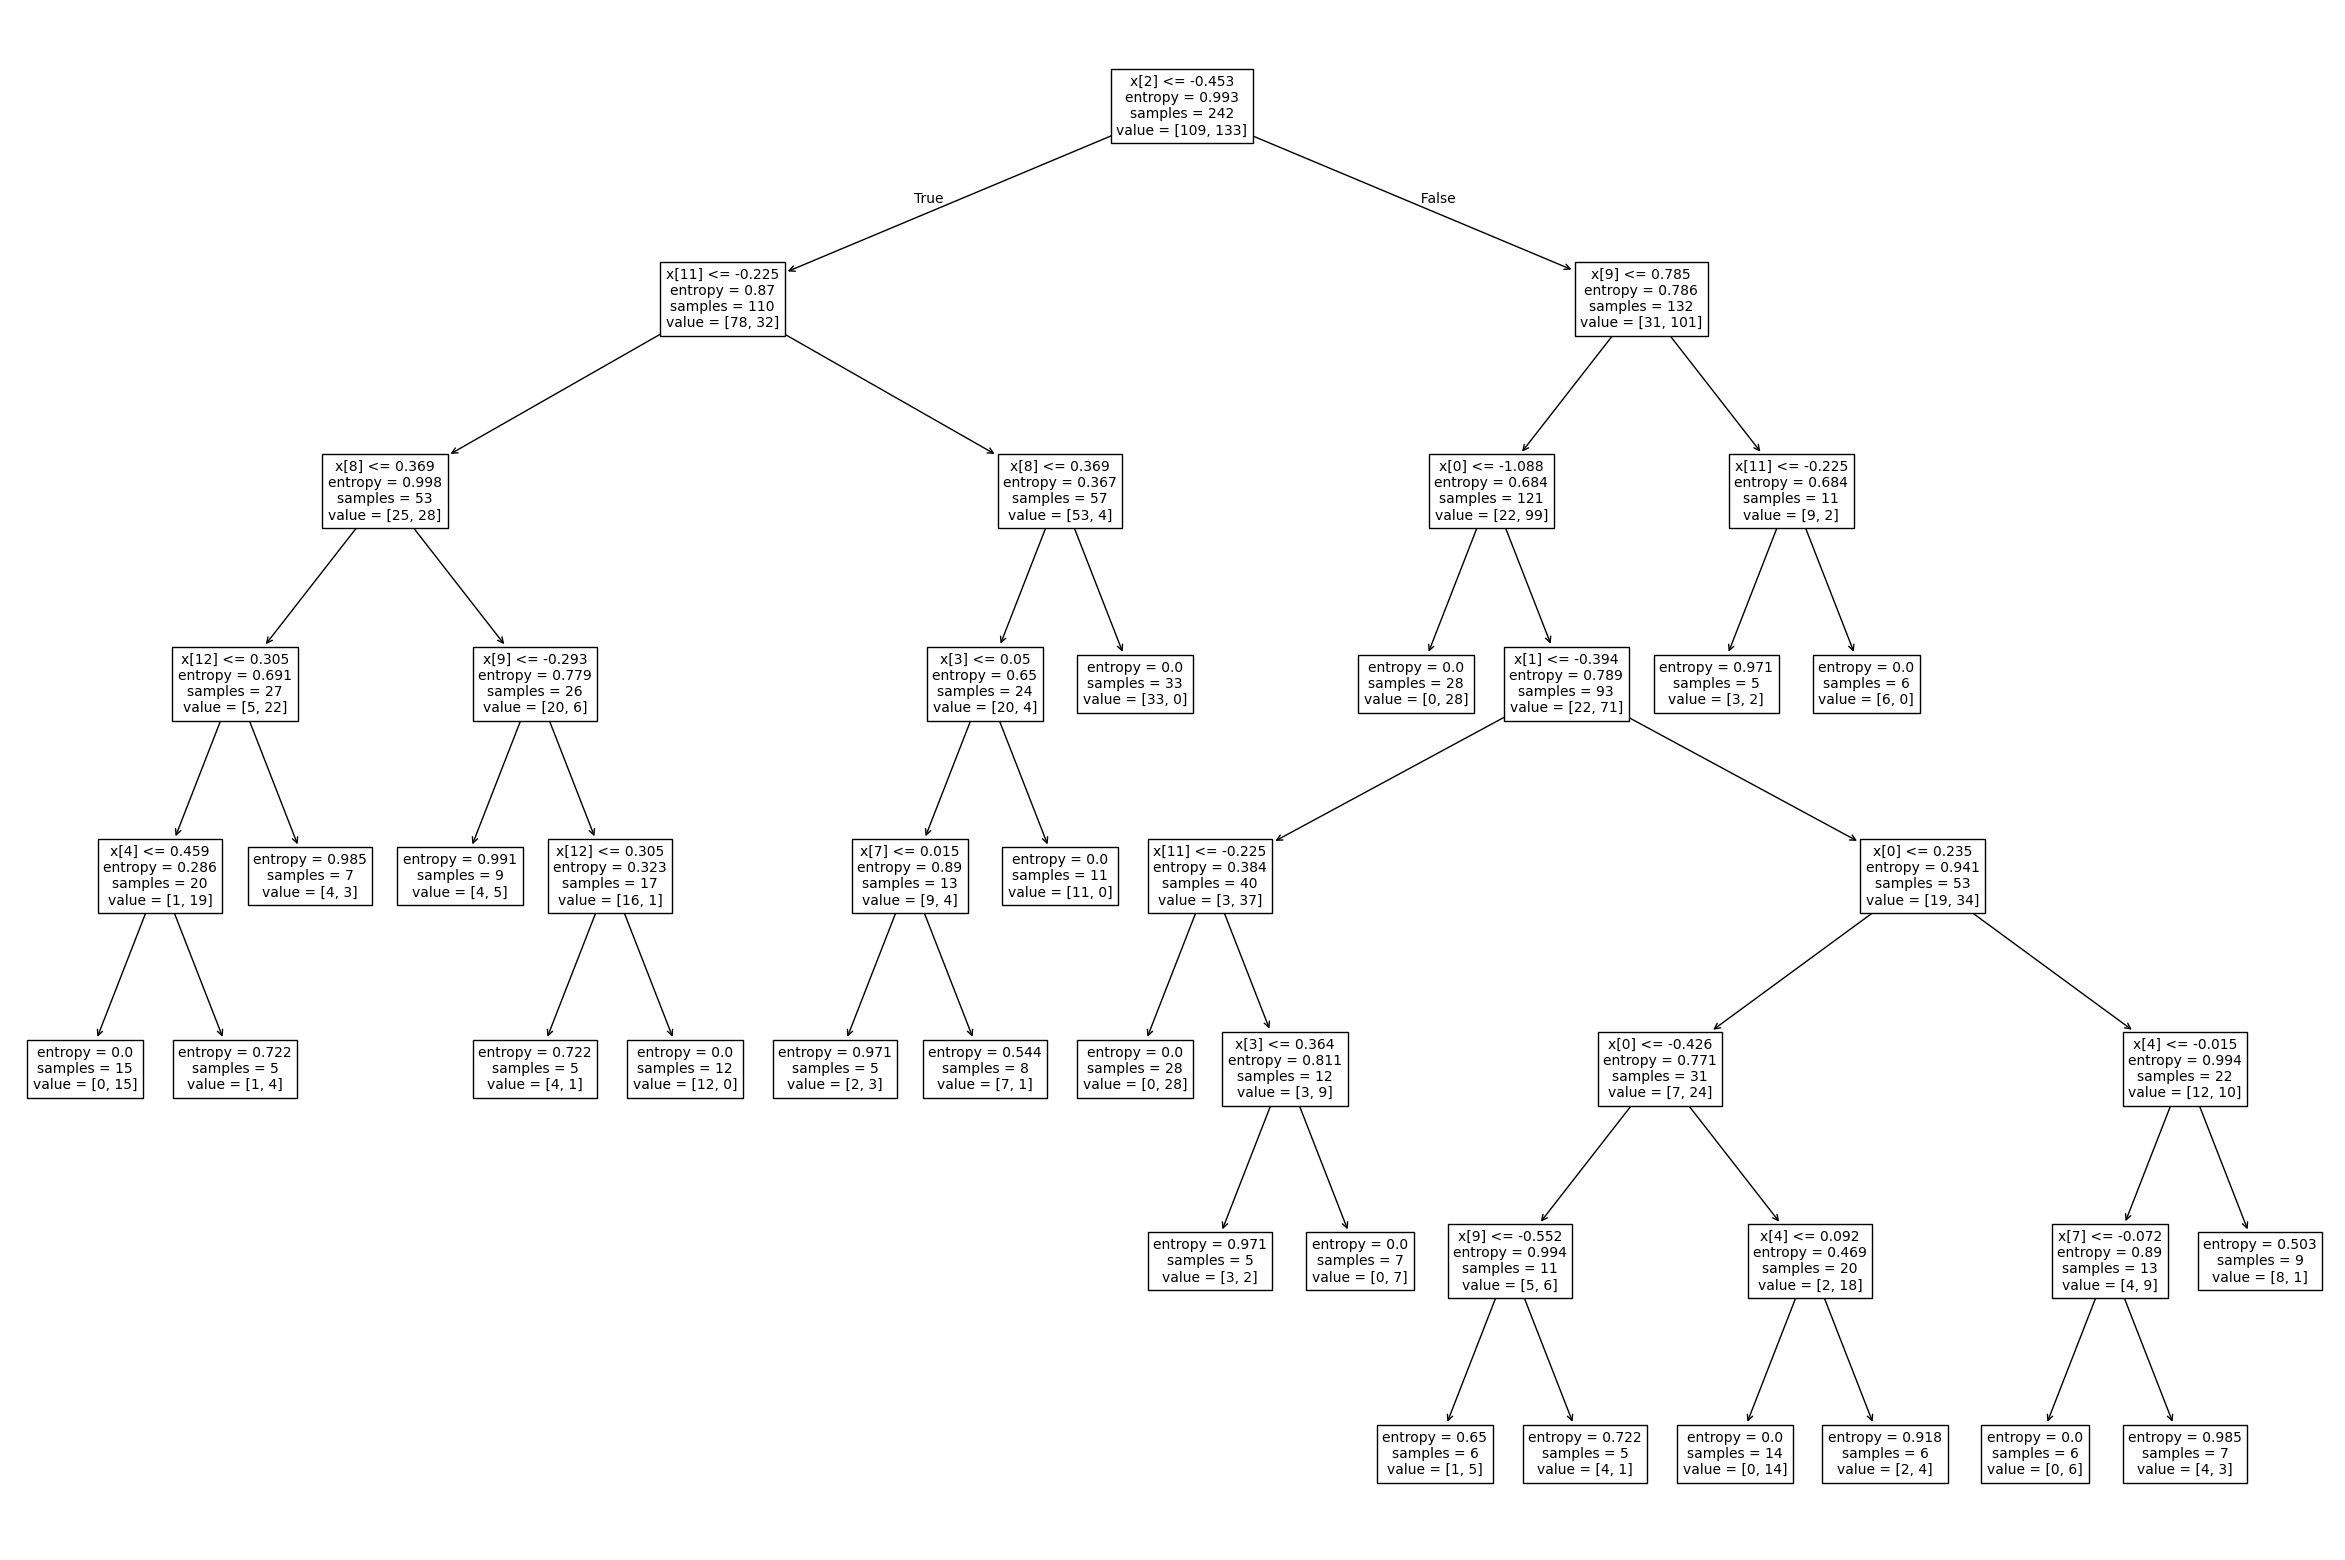

In [37]:
plt.figure(figsize=(30,20))
plot_tree(new_dt,fontsize=10)
plt.show()

In [38]:
y_proba=new_dt.predict_proba(X_test)[:,1]

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score

In [40]:
fpr,tpr,threshold=roc_curve(y_test,y_proba)

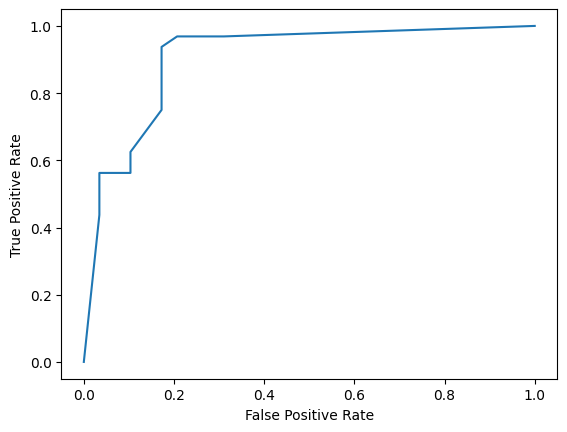

In [41]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
print('auc score:',round(roc_auc_score(y_test,y_proba),3))

auc score: 0.906


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth: Limits the depth of the tree; prevents overfitting

min_samples_split: Minimum samples required to split a node; higher values reduce overfitting

min_samples_leaf: Minimum samples at a leaf node; improves generalization

max_features: Number of features considered at each split; adds randomness

criterion: Metric to measure split quality (Gini or Entropy)

max_leaf_nodes: Limits total leaf nodes; controls tree size

2. What is the difference between the Label encoding and One-hot encoding?


Label encoding and one-hot encoding are techniques used to convert categorical variables into numerical form. Label encoding assigns a unique integer to each category, which introduces an implicit ordinal relationship among categories. One-hot encoding converts each category into a separate binary column, ensuring that no ordinal relationship is assumed. Label encoding is suitable for ordinal data, while one-hot encoding is preferred for nominal data to avoid misleading the model.